<a href="https://colab.research.google.com/github/PaulaBergamasco/EnfermedadCardiaca/blob/main/Poyecto_DS_Bergamasco_Paula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importación de librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid", rc={"grid.color": "0.95", "axes.labelsize": 12, "xtick.labelsize": 10, "ytick.labelsize": 10})

In [2]:
#conección con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATASET ENFERMEDAD CARDIACA

###CONTEXTO EMPRESARIAL

La enfermedad cardíaca incluye una gran variedad de afecciones que afectan al corazón. Las enfermedades cardíacas son una de las principales causas de muerte en el mundo. Cada año mueren más personas por enfermedades cardiovasculares (ECV) que por cualquier otra causa.
Los factores de riesgo claves de enfermedad cardíaca son: presión arterial alta, colesterol alto, tabaquismo, diabetes, obesidad (IMC alto), no realizar suficiente actividad física, beber demasiado alcohol, edad, sexo, antecedentes familiaresm y estrés.
Detectar y prevenir los factores que más inciden en las enfermedades del corazón es muy importante en el ámbito sanitario.
El objetivo de la notebook es investigar si es factible predecir la enfermedad cardiaca en individuos a partir de una encuesta telefónica.

###PROBLEMA COMERCIAL


Podría a partir del conjunto de datos predecirse la enfermedad cardiaca en pacientes en función de su historial médico? Esto puede ser útil para los profesionales de la salud en la identificación de pacientes que pueden estar en riesgo de desarrollar alguna enfermedad cardiaca y en el desarrollo de planes de tratamiento personalizados. Además, se puede explorar las relaciones entre varios factores médicos y la probabilidad de desarrollar otras enfermedades.

###CONTEXTO ANALÍTICO




El conjunto de datos proviene de los CDC (Centros para el Control y la Prevención de Enfermedades) y es una parte importante del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes de EE. UU. El conjunto de datos incluye datos del 2020, y consta de 319795 filas y 279 columnas, pero para este proyecto se redujo a 18 variables. La gran mayoría de las columnas son preguntas que se hacen a los encuestados sobre su estado de salud. En este conjunto de datos, se incluyeron diferentes factores que directa o indirectamente influyen en la enfermedad cardíaca. Se debe tratar la variable "Enfermedad cardíaca" como binaria ("Sí", el encuestado tenía una enfermedad cardíaca; "No": el encuestado no tenía ninguna enfermedad cardíaca).

####FUENTE: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

####VARIABLES

El dataset está conformado por 18 variables, la variable objetivo 'EnfermedadCardiaca', la cual es una variable categórica que indica si el individuo presenta o no alguna enfermedad cardiaca, 13 variables categóricas, que indican si el individuo presenta o no determinada condición, o describen alguna característica del mismo, las cuales son, 'Fumar', 'ConsumoAlcohol', 'AccidenteCerebroVascular', 'DificultadCaminar', 'Sexo', 'Edad'(categórica ya que la edad se encuentra diferenciada por rangos etarios), 'Raza', 'Diabetes', 'ActividadFísica', 'SaludGeneral', 'Asma', 'EnfermedadRenal', 'CancerDePiel', y 4 variables numéricas, 'IMC', 'SaludFisica', 'SaludMental' y 'HorasSueño'. A continuación se describen en detalle cada una de ellas:

1. EnfermedadCardiaca: Encuestados que han reportado alguna vez haber tenido enfermedad coronaria o infarto de miocardio. Variable objetivo.
2. IMC: Índice de Masa Corporal.
3. Fumar: ¿Has fumado al menos 100 cigarrillos en toda tu vida?
4. ConsumoAlcohol: Bebedores frecuentes (hombres adultos que toman más de 14 bebidas por semana y mujeres adultas que toman más de 7 bebidas por semana).
5. AccidenteCerebroVascular: ¿Alguna vez te han dicho que tuviste un accidente cerebrovascular?
6. SaludFisica: Pensando en tu salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días de los últimos 30 días tu salud física fue mala?
7. SaludMental: Pensando en tu salud mental, ¿durante cuántos días de los últimos 30 días tu salud mental no fue buena?
8. DificultadCaminar: ¿Tienes dificultades graves para caminar o subir escaleras?
9. Sexo: ¿Eres hombre o mujer?
10. Edad: Categoría de edad de catorce niveles.
11. Raza: Raza/etnicidad.
12. Diabetes: ¿Alguna vez te han dicho que tienes diabetes?
13. ActividadFísica: Adultos que informaron haber realizado actividad física o ejercicio en los últimos 30 días que no fuera parte de su trabajo habitual.
14. SaludGeneral: Estado de salud general.
15. HorasSueño: En promedio, ¿cuántas horas de sueño obtienes en un período de 24 horas?
16. Asma: ¿Alguna vez te han dicho que tienes asma?
17. EnfermedadRenal: Sin incluir piedras en los riñones, infección de la vejiga o incontinencia, ¿alguna vez te han dicho que tienes enfermedad renal?
18. CancerDePiel: ¿Alguna vez te han dicho que tienes cáncer de piel?

###DATASET

In [3]:
#carga del dataset
df= pd.read_csv('/content/drive/MyDrive/CODERHOUSE/Data Scientist/Datasets/Enfermedad cardiaca.csv')

In [4]:
#definición de los nombres de las columnas
nombre_columnas= ["EnfermedadCardiaca", "IMC", "Fumar", "ConsumoAlcohol", "AccidenteCerebroVascular", "SaludFisica", "SaludMental", "DificultadCaminar", "Sexo", "Edad", "Raza", "Diabetes", "ActividadFisica", "SaludGeneral", "HorasSueño", "Asma", "EnfermedadRenal", "CancerDePiel"]

In [5]:
#renombre de los nombres de las columnas
df.columns = nombre_columnas

In [6]:
df.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df.shape

(319795, 18)

In [8]:
df.columns

Index(['EnfermedadCardiaca', 'IMC', 'Fumar', 'ConsumoAlcohol',
       'AccidenteCerebroVascular', 'SaludFisica', 'SaludMental',
       'DificultadCaminar', 'Sexo', 'Edad', 'Raza', 'Diabetes',
       'ActividadFisica', 'SaludGeneral', 'HorasSueño', 'Asma',
       'EnfermedadRenal', 'CancerDePiel'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   EnfermedadCardiaca        319795 non-null  object 
 1   IMC                       319795 non-null  float64
 2   Fumar                     319795 non-null  object 
 3   ConsumoAlcohol            319795 non-null  object 
 4   AccidenteCerebroVascular  319795 non-null  object 
 5   SaludFisica               319795 non-null  float64
 6   SaludMental               319795 non-null  float64
 7   DificultadCaminar         319795 non-null  object 
 8   Sexo                      319795 non-null  object 
 9   Edad                      319795 non-null  object 
 10  Raza                      319795 non-null  object 
 11  Diabetes                  319795 non-null  object 
 12  ActividadFisica           319795 non-null  object 
 13  SaludGeneral              319795 non-null  o

Se puede observar que ninguna de las variables del dataset presenta valores nulos.



In [10]:
df.describe()

,IMC,SaludFisica,SaludMental,HorasSueño
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
conteo_salud_mental = df[df['SaludMental'] > 0].shape[0]
print('Cantidad de valores de Salud Mental mayores que 0:', conteo_salud_mental)
conteo_salud_fisica = df[df['SaludFisica'] > 0].shape[0]
print('Cantidad de valores de Salud Física mayores que 0:', conteo_salud_fisica)

Cantidad de valores de Salud Mental mayores que 0: 114394
Cantidad de valores de Salud Física mayores que 0: 93206


Con respecto a las variables cuantitativas podemos ver que las variables salud física y salud mental la gran mayoría de los datos son igual a 0, es decir que tenemos escasos valores positivos, solo un 25% aproximadamente del total de los casos, esto no quiere decir que sean datos erroneos, solo que la mayoría de los individuos encuestados presentan un buen estado de salud tanto fisica como mental. Ahora para el caso de IMC y HorasSueño podemos ver que existen valores muy extremos que podrían tratarse de outliers.

In [12]:
variables_categoricas=['EnfermedadCardiaca', 'Fumar', 'ConsumoAlcohol','AccidenteCerebroVascular', 'DificultadCaminar', 'Sexo', 'Edad', 'Raza', 'Diabetes','ActividadFisica', 'SaludGeneral', 'Asma','EnfermedadRenal', 'CancerDePiel']

In [13]:
variables_numericas= ['IMC',	'SaludFisica', 'SaludMental', 'HorasSueño', 'EnfermedadCardiaca']

In [14]:
for x in variables_categoricas:
 print(x, df[x].unique())
 print(df[x].value_counts())
 print('------------------------------------------------------------------')

EnfermedadCardiaca ['No' 'Yes']
No     292422
Yes     27373
Name: EnfermedadCardiaca, dtype: int64
------------------------------------------------------------------
Fumar ['Yes' 'No']
No     187887
Yes    131908
Name: Fumar, dtype: int64
------------------------------------------------------------------
ConsumoAlcohol ['No' 'Yes']
No     298018
Yes     21777
Name: ConsumoAlcohol, dtype: int64
------------------------------------------------------------------
AccidenteCerebroVascular ['No' 'Yes']
No     307726
Yes     12069
Name: AccidenteCerebroVascular, dtype: int64
------------------------------------------------------------------
DificultadCaminar ['No' 'Yes']
No     275385
Yes     44410
Name: DificultadCaminar, dtype: int64
------------------------------------------------------------------
Sexo ['Female' 'Male']
Female    167805
Male      151990
Name: Sexo, dtype: int64
------------------------------------------------------------------
Edad ['55-59' '80 or older' '65-69' '75-79' '

Como vimos anteriorrmente con las variables númericas se puede ver que hay un desbalance para la mayoría de las variables, y esto puede deberse como se mencionó anteriormente que la mayoría de los encuestados son personas aparentemente sanas.

#VISUALIZACIONES

A continuación se realizan distintas visualizaciones para demostrar como es el comportamiento de las distintas variables respecto a la variable objetivo.

###VARIABLES NUMÉRICAS

Existe alguna diferencia entre el comportamiento de las diferentes variables numéricas respecto de los pacientes con enfermedad cardiaca y sin enfermedad cardiaca?

En primer lugar evaluaremos el comportamiento del IMC y las Horas de sueño.

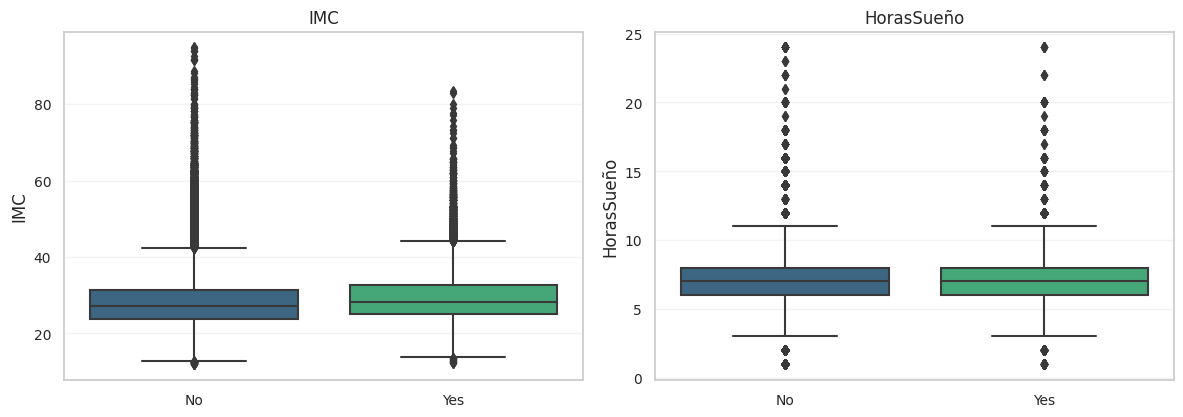

In [15]:
#se grafican las variables IMC y HorasSueño para evaluar su comportamiento respecto a la variable EnfermedadCardiaca
plt.figure(figsize=(12, 8))

selected_columns = [variables_numericas[0], variables_numericas[3]]

for i, j in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='EnfermedadCardiaca', y=j, data=df, showfliers=True, palette='viridis')
    plt.title(j)
    plt.xlabel('')

plt.tight_layout()

En este caso se puede observar que si bien no pareciera existir una relación con la variable HorasSueño si lo hay con la variable IMC, donde se observan valores mayores para aquellas personas que presentan enfermedad cardiaca. A continuación analizaremos el comportamiento de la variable IMC en más detalle. Pero antes se trataran los outliers, ya que como se vio anteriormente y como se demuestra en el gráfico ambas variables presentan valores atípicos.




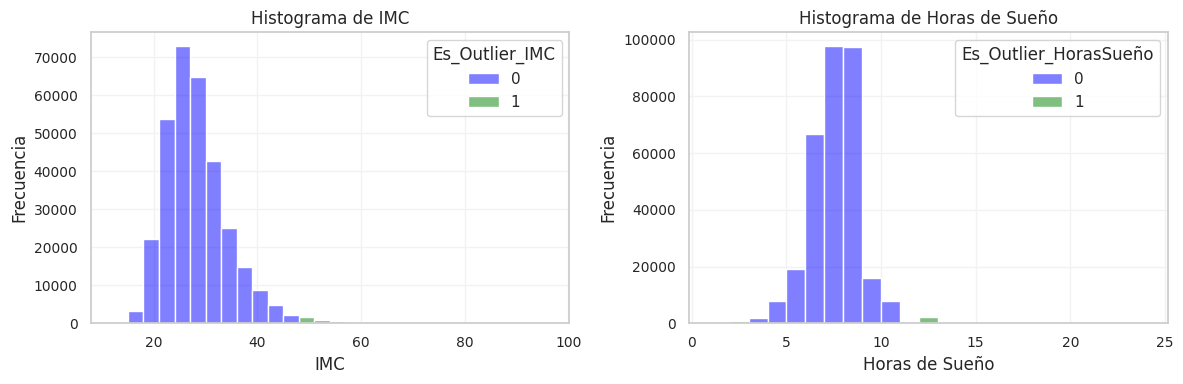

In [16]:
df_outliers= df.copy()

# Identificación de outliers usando el método Z-Score
z_scores_imc = np.abs(stats.zscore(df_outliers['IMC']))
umbral_imc = 3  # Se define como umbral 3 desviaciones estándar
outliers_indices_imc = np.where(z_scores_imc > umbral_imc)

z_scores_hs = np.abs(stats.zscore(df_outliers['HorasSueño']))
umbral_hs = 3  # Se define como umbral 3 desviaciones estándar
outliers_indices_hs = np.where(z_scores_hs > umbral_hs)

# Crear un DataFrame con columnas de indicadores para outliers
df_outliers['Es_Outlier_IMC'] = 0
df_outliers['Es_Outlier_HorasSueño'] = 0
df_outliers.loc[outliers_indices_imc[0], 'Es_Outlier_IMC'] = 1
df_outliers.loc[outliers_indices_hs[0], 'Es_Outlier_HorasSueño'] = 1

plt.figure(figsize=(12, 4))

# Subtrama 1: Histograma de IMC con marcadores para outliers
plt.subplot(1, 2, 1)
sns.histplot(data=df_outliers, x='IMC', hue='Es_Outlier_IMC',  palette={0: 'blue', 1: 'green'}, binwidth=3)
plt.title('Histograma de IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')

# Subtrama 2: Histograma de Horas de Sueño con marcadores para outliers
plt.subplot(1, 2, 2)
sns.histplot(data=df_outliers, x='HorasSueño', hue='Es_Outlier_HorasSueño',  palette={0: 'blue', 1: 'green'}, binwidth=1)
plt.title('Histograma de Horas de Sueño')
plt.xlabel('Horas de Sueño')
plt.ylabel('Frecuencia')

# Ajustar el diseño de las subtramas
plt.tight_layout()

In [17]:
outliers_indices_imc

(array([   105,    229,    254, ..., 319636, 319709, 319725]),)

In [18]:
# Contar valores atípicos para la variable 'IMC'
outliers_imc = len(outliers_indices_imc[0])

# Contar valores atípicos para la variable 'HorasSueño'
outliers_horas_sueño = len(outliers_indices_hs[0])

print(f"Valores atípicos en IMC: {outliers_imc}")
print(f"Valores atípicos en HorasSueño: {outliers_horas_sueño}")

Valores atípicos en IMC: 4081
Valores atípicos en HorasSueño: 4543


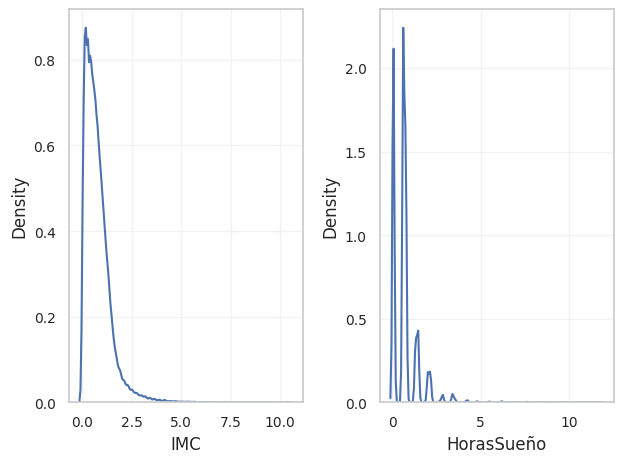

In [19]:
plt.subplot(1, 2, 1)
sns.kdeplot(data=z_scores_imc)
plt.subplot(1, 2, 2)
sns.kdeplot(data=z_scores_hs)
plt.tight_layout()

In [20]:
df_outliers

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel,Es_Outlier_IMC,Es_Outlier_HorasSueño
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,0,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0,0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0,1


In [21]:
# Genera valores aleatorios para 'IMC' y 'HorasSueño' basados en la media y la desviación estándar
random_values_imc = np.random.normal(loc=df_outliers['IMC'].mean(),
                                     scale=df_outliers['IMC'].std(),
                                     size=len(outliers_indices_imc[0]))

random_values_hs = np.random.normal(loc=df_outliers['HorasSueño'].mean(),
                                    scale=df_outliers['HorasSueño'].std(),
                                    size=len(outliers_indices_hs[0]))

# Reemplaza outliers con los valores aleatorios basados en la media y la desviación estándar
df_outliers.loc[z_scores_imc > umbral_imc, 'IMC'] = random_values_imc
df_outliers.loc[z_scores_hs > umbral_hs, 'HorasSueño'] = random_values_hs

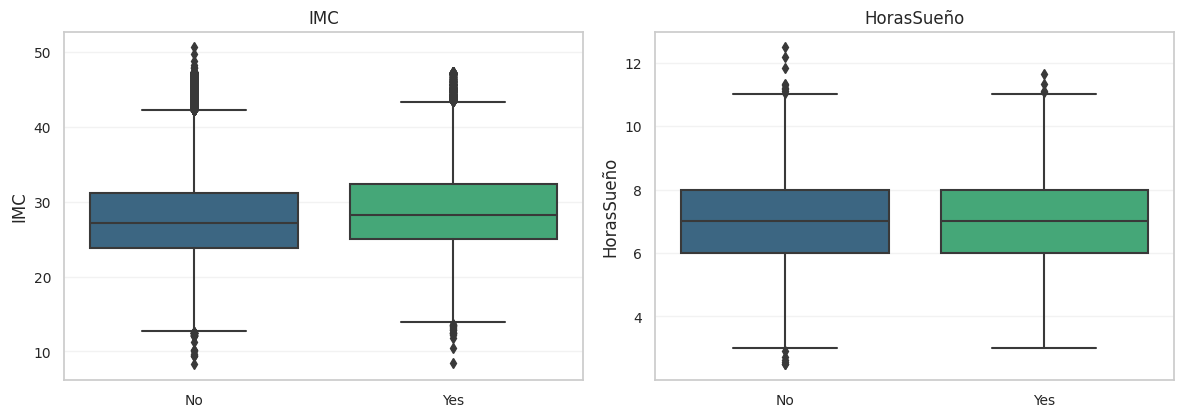

In [22]:
plt.figure(figsize=(12, 8))

selected_columns = [variables_numericas[0], variables_numericas[3]]

for i, j in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='EnfermedadCardiaca', y=j, data=df_outliers, showfliers=True, palette='viridis')
    plt.title(j)
    plt.xlabel('')

plt.tight_layout()

Se utiliza como estrategia para identificar los outliers a aquellos que superen en 3 veces la desviación estandar (tanto para valores inferiores como para valores superiores) y se los reemplaza por valores aleatorios basados en la media y la desviación estándar.

In [23]:
#se crea un dataframe que incluye solo aquellas personas de sexo masculino
df_m=df_outliers[df_outliers['Sexo'] == 'Male']

In [24]:
#se crea un dataframe que incluye solo aquellas personas de sexo femenino
df_f=df_outliers[df_outliers['Sexo'] == 'Female']

In [25]:
#se calcula la media del IMC para hombres y mujeres
mean_imc_m = df_m['IMC'].mean()
mean_imc_f = df_f['IMC'].mean()

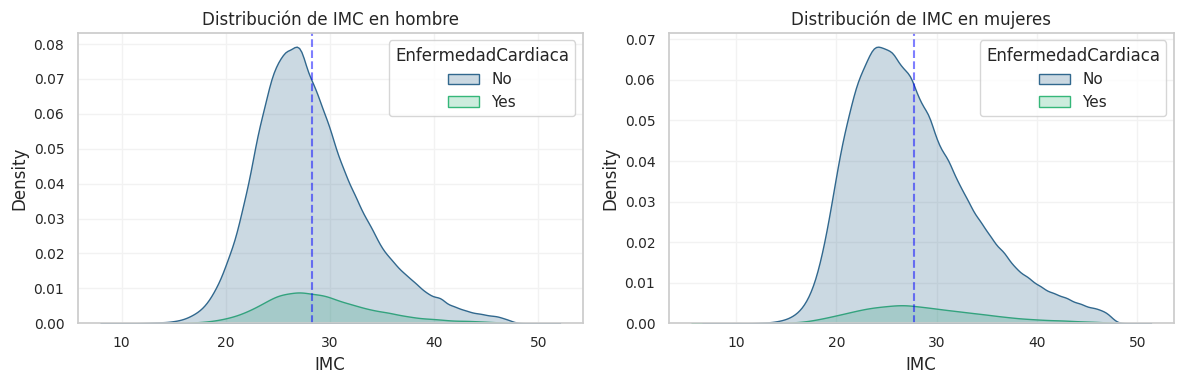

In [26]:
#disfribución del IMC diferenciado por sexo en relación a la presencia o no de enfermedad cardíaca
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data=df_m, x= 'IMC', hue='EnfermedadCardiaca', fill=True, palette= 'viridis', ax=ax[0])
ax[0].set_title("Distribución de IMC en hombre")
ax[0].axvline(mean_imc_m, color='blue', linestyle='--', label='Media', alpha=0.5)

sns.kdeplot(data=df_f, x= 'IMC', hue='EnfermedadCardiaca', fill=True, palette= 'viridis', ax=ax[1])
ax[1].set_title("Distribución de IMC en mujeres")
ax[1].axvline(mean_imc_f, color='blue', linestyle='--', label='Media', alpha=0.5)

plt.tight_layout()


Se puede observar que en ambos casos, en hombres como en mujeres, el IMC en personas sin enfermedad cardiaca esta por debajo de la media.

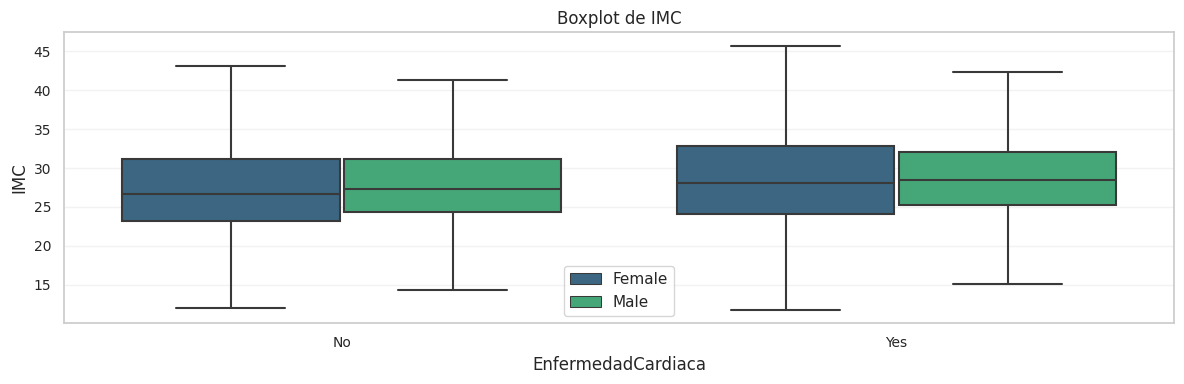

In [27]:
#se grafica boxplot de IMC para evaluar su distribución diferenciado por sexo y por enfermedad cardiaca
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(x='EnfermedadCardiaca', y='IMC', data=df_outliers, showfliers=False, palette='viridis', hue='Sexo', ax=ax)
ax.set_title("Boxplot de IMC")
ax.legend()

plt.tight_layout()

Se puede observar que en hombres la mediana de IMC es levemente superior en ambos casos.

Ahora evaluaremos el comportamiento de la salud física y la salud mental.

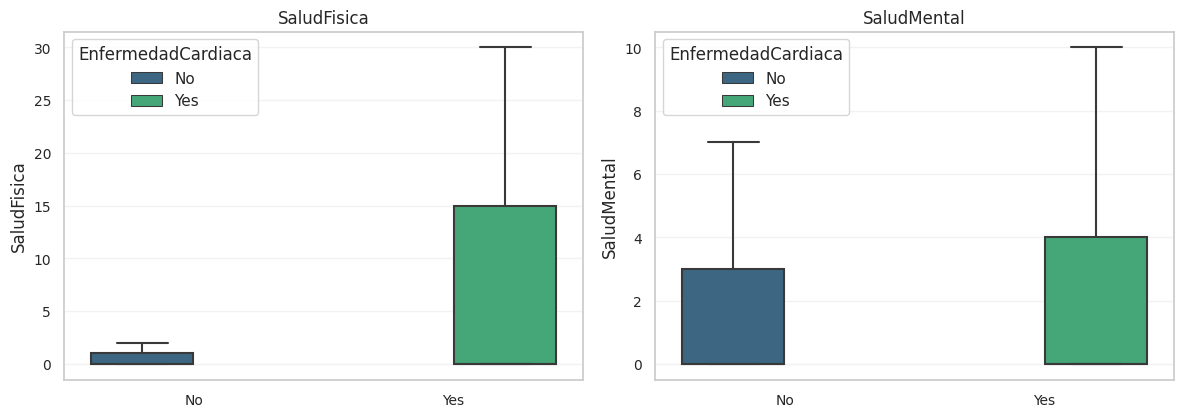

In [28]:
#se grafica boxplot de salud física y salud mental para evaluar su comportamiento diferenciado por enfermedad cardiaca
plt.figure(figsize=(12, 8))

selected_columns = [variables_numericas[1], variables_numericas[2]]

for i, j in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='EnfermedadCardiaca', y=j, data=df, hue='EnfermedadCardiaca', showfliers=False, palette='viridis')
    plt.title(j)
    plt.xlabel('')

plt.tight_layout()

En este caso se puede observar que con la variable SaludMental no pareciera existir una relación pero si podría haberlo con la variable SaludFisica, ya que se observan mayores valores para aquellas personas que presentan enfermedad cardiaca con respecto a las que no.




In [29]:
#se evalua el promedio de la salud física en relación a enfermedad cardiaca
df_saludfisica = df.groupby(by='EnfermedadCardiaca')['SaludFisica'].mean().round(1)
df_saludfisica = df_saludfisica.reset_index()
df_saludfisica.columns = ['EnfermedadCardiaca', 'SaludFisicaPromedio']
print(df_saludfisica)

  EnfermedadCardiaca  SaludFisicaPromedio
0                 No                  3.0
1                Yes                  7.8


In [30]:
#se evalua el promedio de la salud mental en relación a enfermedad cardiaca
df_saludmental = df.groupby(by='EnfermedadCardiaca')['SaludMental'].mean().round(1)
df_saludmental = df_saludmental.reset_index()
df_saludmental.columns = ['EnfermedadCardiaca', 'SaludMentalPromedio']
print(df_saludmental)

  EnfermedadCardiaca  SaludMentalPromedio
0                 No                  3.8
1                Yes                  4.6


Aquí podemos ver como el promedio de salud física en enfermos cardiacos es mayor que en no enfermos cardiacos, a diferencia de enfermedad mental donde las medias son similares.

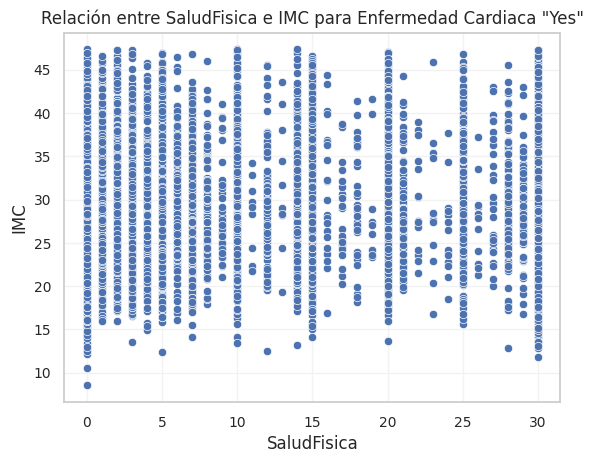

In [31]:
df_enfermedad_si = df_outliers[df_outliers['EnfermedadCardiaca'] == 'Yes']
sns.scatterplot(data=df_enfermedad_si, x='SaludFisica', y='IMC')
plt.title('Relación entre SaludFisica e IMC para Enfermedad Cardiaca "Yes"')
plt.show()

Al evaluar las dos variables numéricas que parecieran tener una relación con la variable EnfermedadCardiaca se puede ver que no existe una correlación entre ellas.

###VARIABLES CATEGÓRICAS

Existe alguna diferencia entre el comportamiento de las diferentes variables categóricas respecto de los pacientes con enfermedad cardiaca y sin enfermedad cardiaca?

Existe una predisposición a manifestar una enfermedad cardiaca de acuerdo al sexo?

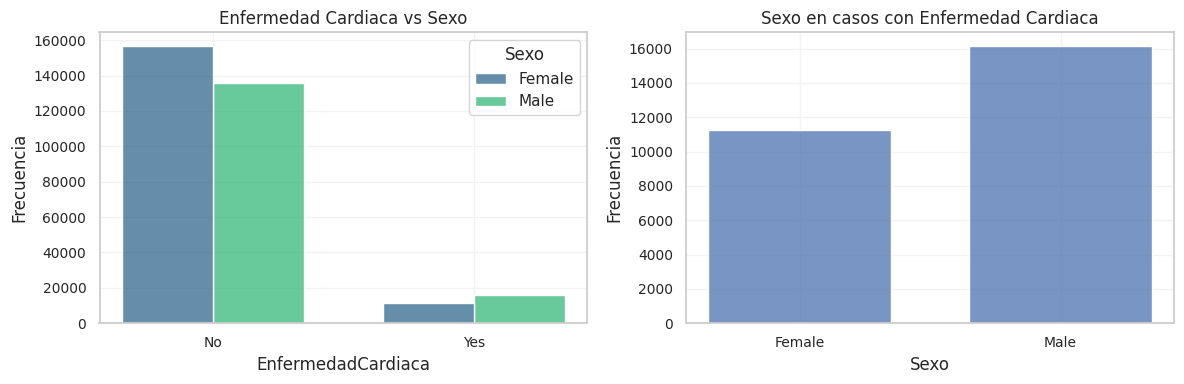

In [32]:
#gráfico de barras relacionando la presencia o no de enfermedad cardíaca en relación al sexo
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=df, x="EnfermedadCardiaca", hue="Sexo", multiple="dodge", shrink= 0.7, palette="viridis", ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Sexo")
ax[0].set_ylabel("Frecuencia")
sns.histplot(data=df[df['EnfermedadCardiaca'].eq('Yes')], x="Sexo", shrink= 0.7, ax=ax[1])
ax[1].set_title("Sexo en casos con Enfermedad Cardiaca")
ax[1].set_ylabel("Frecuencia")
plt.tight_layout()

In [33]:
df['Sexo'].value_counts()

Female    167805
Male      151990
Name: Sexo, dtype: int64

In [34]:
df['EnfermedadCardiaca'].value_counts()

No     292422
Yes     27373
Name: EnfermedadCardiaca, dtype: int64

In [35]:
#cálculo del porcentaje de personas que presentan enfermedad cardíaca respecto del total de personas encuestadas
enf_car= df['EnfermedadCardiaca'][df['EnfermedadCardiaca'] == 'Yes'].count()
no_enf_car= df['EnfermedadCardiaca'][df['EnfermedadCardiaca'] == 'No'].count()

porcentaje_enf_car= enf_car * 100 / (enf_car + no_enf_car)
porcentaje_enf_car

8.559545959130068

Se puede observar que del número de total de encuestado solo un pequeño porcentaje (8.55%) presentó alguna enfermedad cardíaca, y de ellos, se ve que hay una frecuencia mayor en hombres que en mujeres.

Y existe una relación hay con la edad?

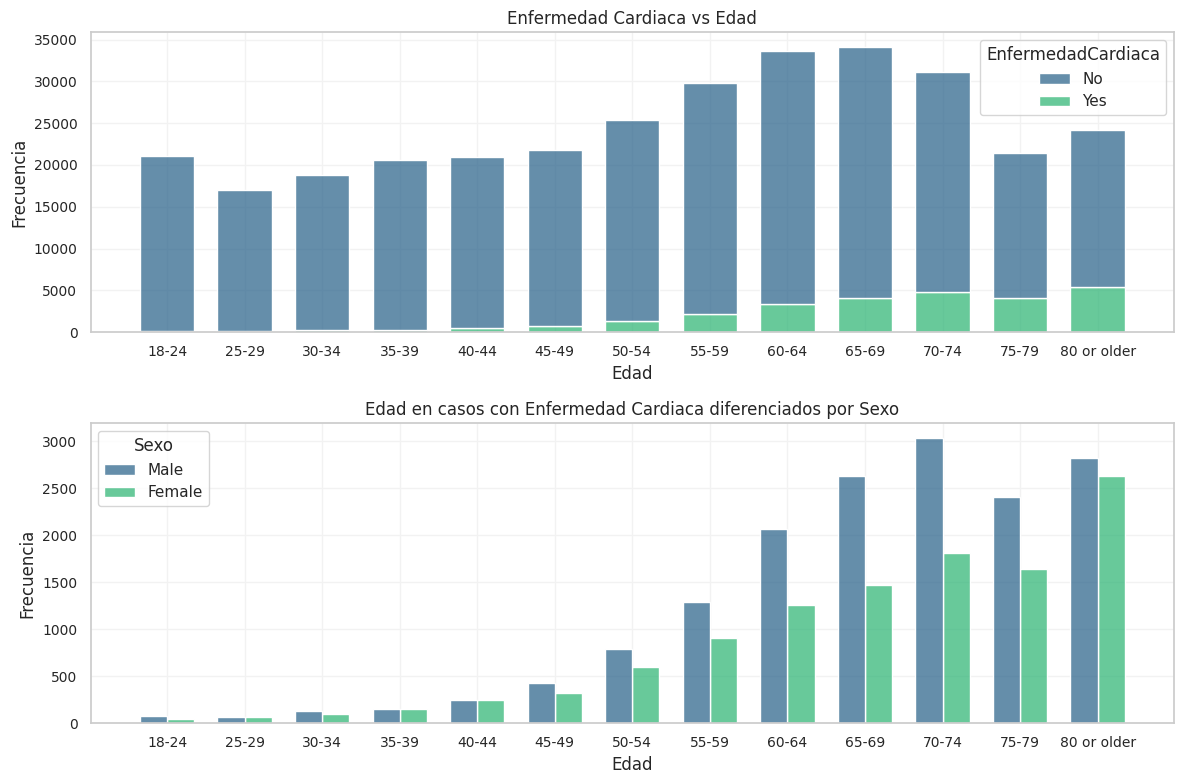

In [36]:
#gráfico de barras relacionando la presencia o no de enfermedad cardíaca en relación a la edad
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.histplot(data=df.sort_values(by='Edad'), x='Edad', hue="EnfermedadCardiaca", multiple="stack", shrink= 0.7, palette="viridis", ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Edad")
ax[0].set_ylabel("Frecuencia")
sns.histplot(data=df.sort_values(by='Edad').loc[df['EnfermedadCardiaca'] == 'Yes'], x='Edad', hue='Sexo', multiple="dodge", shrink= 0.7, palette="viridis", ax=ax[1])
ax[1].set_title("Edad en casos con Enfermedad Cardiaca diferenciados por Sexo")
ax[1].set_ylabel("Frecuencia")
plt.tight_layout()

Se puede observar que la edad de los encuentados esta distribuida de manera uniforme. La aparición de enfermedad cardíaca presenta un aumento marcado con el aumento de la edad, en especial a partir de los 40 años, y se ve que la mayor frecuencia en hombres se mantiene aún con el aumento de edad. Ahora veremos como se comporta la variable edad respecto a otras variables.

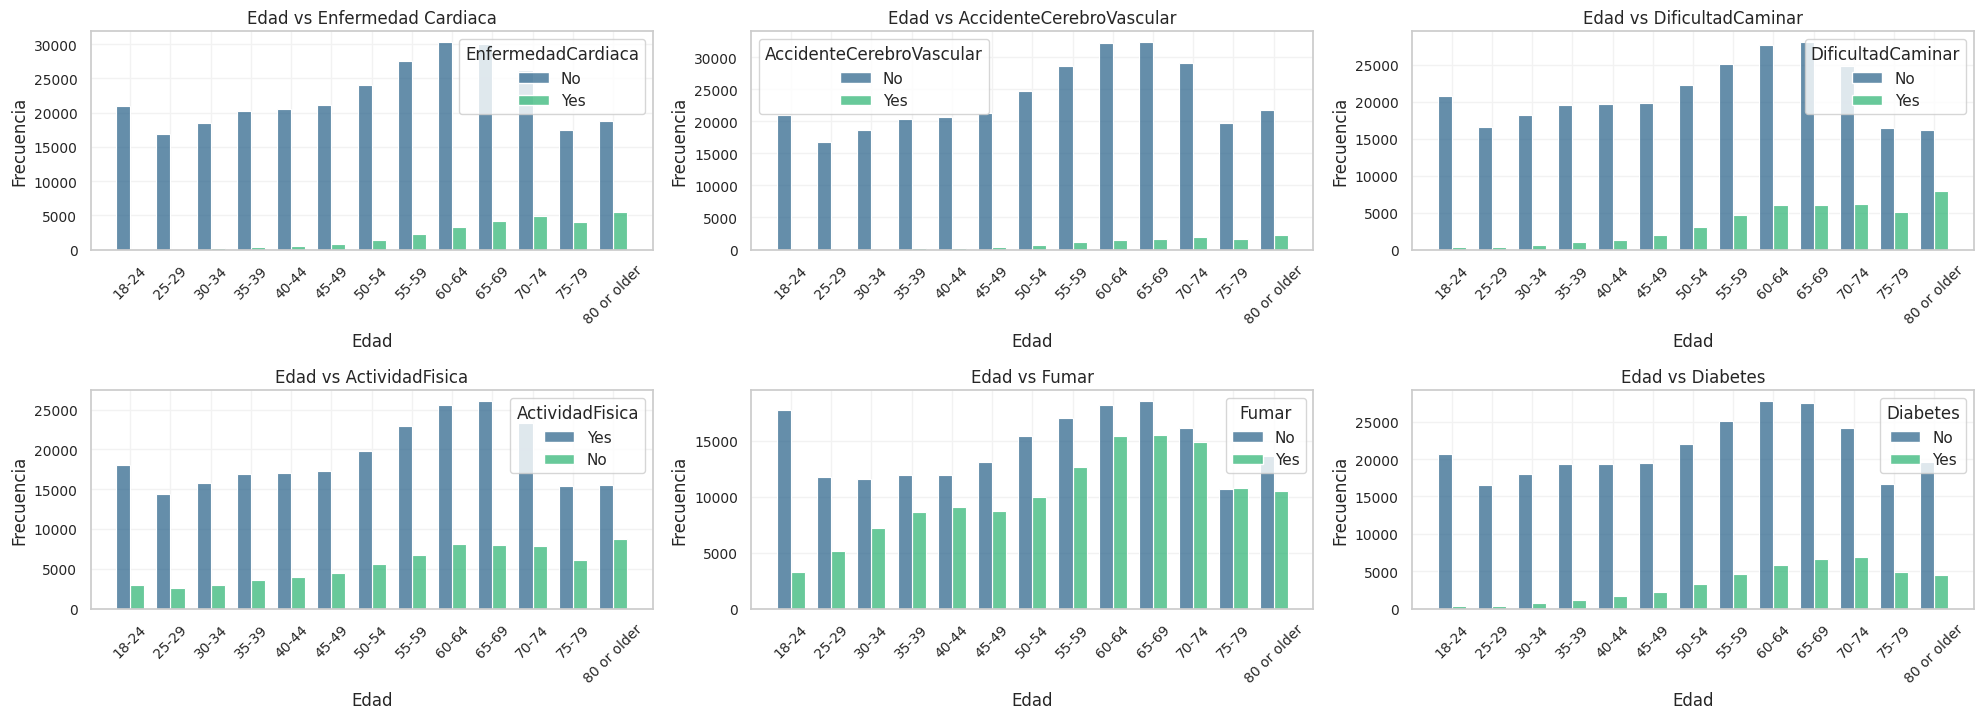

In [73]:
#se grafica edad vs diferentes condiciones
df_diabetes=df.replace(('No, borderline diabetes','Yes (during pregnancy)') ,('No', 'Yes'))
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

sns.histplot(x='Edad', data=df.sort_values(by='Edad'), hue='EnfermedadCardiaca', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[0,0])
ax[0,0].set_title("Edad vs Enfermedad Cardiaca")
ax[0,0].set_ylabel("Frecuencia")
ax[0,0].set_xticks(ax[0, 0].get_xticks())
ax[0,0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)

sns.histplot(x='Edad', data=df.sort_values(by='Edad'), hue='AccidenteCerebroVascular', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[0,1])
ax[0,1].set_title("Edad vs AccidenteCerebroVascular")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_xticks(ax[0,1].get_xticks())
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

sns.histplot(x='Edad', data=df.sort_values(by='Edad'), hue='DificultadCaminar', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[0,2])
ax[0,2].set_title("Edad vs DificultadCaminar")
ax[0,2].set_ylabel("Frecuencia")
ax[0,2].set_xticks(ax[0,2].get_xticks())
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=45)

sns.histplot(x='Edad', data=df.sort_values(by='Edad'), hue='ActividadFisica', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[1,0])
ax[1,0].set_title("Edad vs ActividadFisica")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_xticks(ax[1,0].get_xticks())
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)

sns.histplot(x='Edad', data=df.sort_values(by='Edad'), hue='Fumar', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[1,1])
ax[1,1].set_title("Edad vs Fumar")
ax[1,1].set_ylabel("Frecuencia")
ax[1,1].set_xticks(ax[1,1].get_xticks())
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

sns.histplot(x='Edad', data=df_diabetes.sort_values(by='Edad'), hue='Diabetes', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[1,2])
ax[1,2].set_title("Edad vs Diabetes")
ax[1,2].set_ylabel("Frecuencia")
ax[1,2].set_xticks(ax[1,2].get_xticks())
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Al igual que ocurre con la enfermedad cardiaca, tambien se observa el mismo patrón frente a otras condiciones donde se ve que hay un aumento marcado con el transcurso de la edad.

Existen ciertos factores de riesgo que predisponen a la enfermedad cardiaca, como fumar, consumir alcohol y falta de actividad física, se evaluará la relación que existen entre ellos y la enfermedad cardiaca en nuestro dataset.


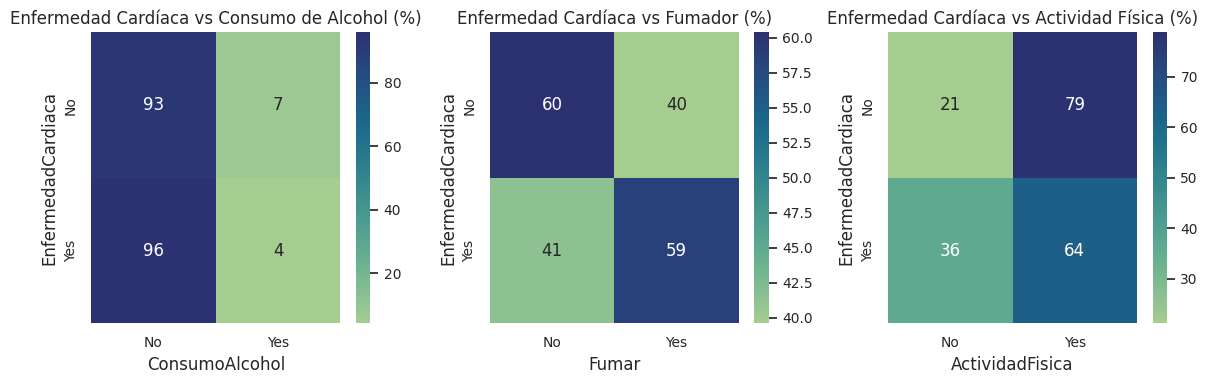

In [38]:
#relación de enfermedad cardíaca con factores de riesgo

#tablas de contingencia
tabla_contingencia_alcohol = pd.crosstab(df['EnfermedadCardiaca'], df['ConsumoAlcohol'])
tabla_contingencia_alcohol_porcentaje = tabla_contingencia_alcohol.div(tabla_contingencia_alcohol.sum(axis=1), axis=0) * 100
tabla_contingencia_fumar = pd.crosstab(df['EnfermedadCardiaca'], df['Fumar'])
tabla_contingencia_fumar_porcentaje = tabla_contingencia_fumar.div(tabla_contingencia_fumar.sum(axis=1), axis=0) * 100
tabla_contingencia_af= pd.crosstab(df['EnfermedadCardiaca'], df['ActividadFisica'])
tabla_contingencia_af_porcentaje = tabla_contingencia_af.div(tabla_contingencia_af.sum(axis=1), axis=0) * 100

#heatmap
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
heatmap1 = sns.heatmap(tabla_contingencia_alcohol_porcentaje, annot=True, cmap='crest', fmt='.0f', ax=ax[0])
heatmap2 = sns.heatmap(tabla_contingencia_fumar_porcentaje, annot=True, cmap='crest', fmt='.0f', ax=ax[1])
heatmap3 = sns.heatmap(tabla_contingencia_af_porcentaje, annot=True, cmap='crest', fmt='.0f', ax=ax[2])

ax[0].set_title('Enfermedad Cardíaca vs Consumo de Alcohol (%)')
ax[1].set_title('Enfermedad Cardíaca vs Fumador (%)')
ax[2].set_title('Enfermedad Cardíaca vs Actividad Física (%)')

plt.tight_layout()


Se puede observar que la enfermedad cardíaca está poco asociada al consumo de alcohol, ya que solo un 4% de las personas que presentan enfermedad cardiaca consumen alcohol, pero si está muy asociado al consumo de cigarrillo, ya que casi un 60% de las que presentan una enfermedad cardiaca son fumadores. Con respecto a la actividad física no es tan marcada la relación pero si se ve que un gran porcentaje de personas que presentan una enfermedad cardiaca no realizan actividad física y que de la mayoria de las personas que no presentan una enfermedad cardiaca realizan actiividad física.

Y que ocurre con la relación con otras enfermedades?

In [39]:
#se crea un dataframe que incluye solo aquellas personas que presentan una enfermedad cardíaca
df_con_enf_car=df[df['EnfermedadCardiaca'] == 'Yes']

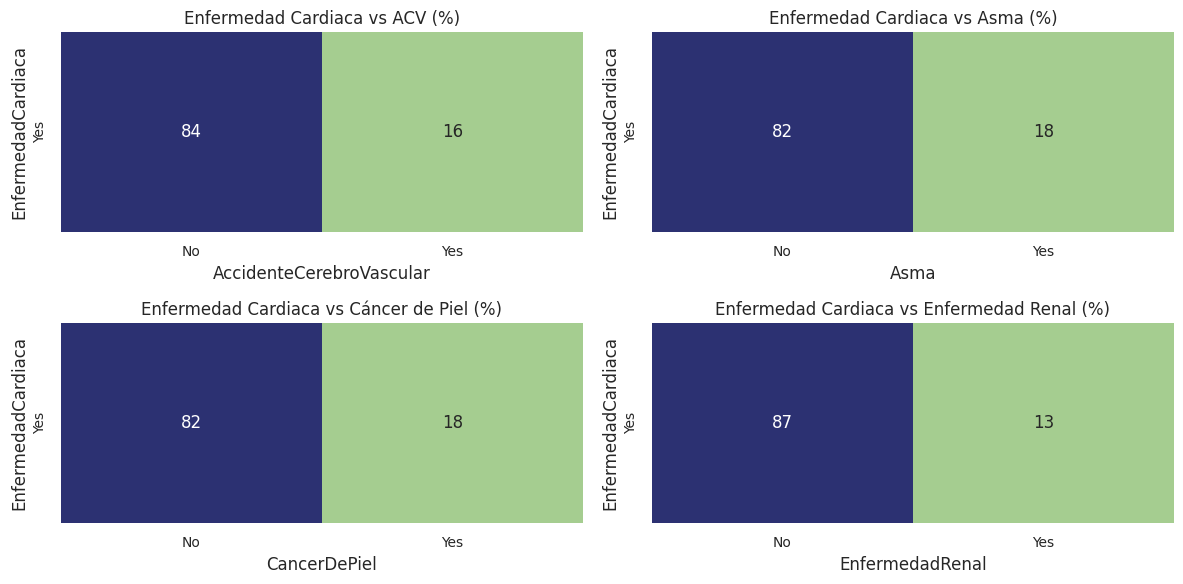

In [40]:
#relación de enfermedad cardíaca con otras enfermedades (se tienen en cuenta solo aquellas personas que presentan alguna enfermedad cardiaca)

#tablas de contingencia
tabla_contingencia_acv= pd.crosstab(df_con_enf_car['EnfermedadCardiaca'], df['AccidenteCerebroVascular'])
tabla_contingencia_acv_porcentaje = tabla_contingencia_acv.div(tabla_contingencia_acv.sum(axis=1), axis=0) * 100
tabla_contingencia_as= pd.crosstab(df_con_enf_car['EnfermedadCardiaca'], df['Asma'])
tabla_contingencia_as_porcentaje = tabla_contingencia_as.div(tabla_contingencia_as.sum(axis=1), axis=0) * 100
tabla_contingencia_cp= pd.crosstab(df_con_enf_car['EnfermedadCardiaca'], df['CancerDePiel'])
tabla_contingencia_cp_porcentaje = tabla_contingencia_cp.div(tabla_contingencia_cp.sum(axis=1), axis=0) * 100
tabla_contingencia_er= pd.crosstab(df_con_enf_car['EnfermedadCardiaca'], df['EnfermedadRenal'])
tabla_contingencia_er_porcentaje = tabla_contingencia_er.div(tabla_contingencia_cp.sum(axis=1), axis=0) * 100

#heatmap
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

heatmap3 = sns.heatmap(tabla_contingencia_acv_porcentaje, annot=True, cmap='crest', fmt='.0f', cbar= False, ax=ax[0, 0])
heatmap5 = sns.heatmap(tabla_contingencia_as_porcentaje, annot=True, cmap='crest', fmt='.0f', cbar= False, ax=ax[0, 1])
heatmap6 = sns.heatmap(tabla_contingencia_cp_porcentaje, annot=True, cmap='crest', fmt='.0f', cbar= False, ax=ax[1, 0])
heatmap7 = sns.heatmap(tabla_contingencia_er_porcentaje, annot=True, cmap='crest', fmt='.0f', cbar= False, ax=ax[1, 1])

ax[0, 0].set_title('Enfermedad Cardiaca vs ACV (%)')
ax[0, 1].set_title('Enfermedad Cardiaca vs Asma (%)')
ax[1, 0].set_title('Enfermedad Cardiaca vs Cáncer de Piel (%)')
ax[1, 1].set_title('Enfermedad Cardiaca vs Enfermedad Renal (%)')

plt.tight_layout()

A partir de este gráfico se puede determinar que la enfermedad cardiaca está poco asociada a estas otras enfermedades, ya que en todos los casos el porcentaje de personas que presentan dichas enfermedades presentan además enfermedad cardiaca.

Se sabe que la diabetes esta asociada a la enfermedad cardiaca, que dicen nuestros datos?

In [41]:
#se crean solo dos categorias de diabetes, Yes y No.
df_diabetes= df.copy()

In [42]:
df_diabetes['Diabetes'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [43]:
df_diabetes=df.replace(('No, borderline diabetes','Yes (during pregnancy)') ,('No', 'Yes'))

In [44]:
df_diabetes['Diabetes'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
df_diabetes['Diabetes'].value_counts()

No     276434
Yes     43361
Name: Diabetes, dtype: int64

In [46]:
df_diabetes.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


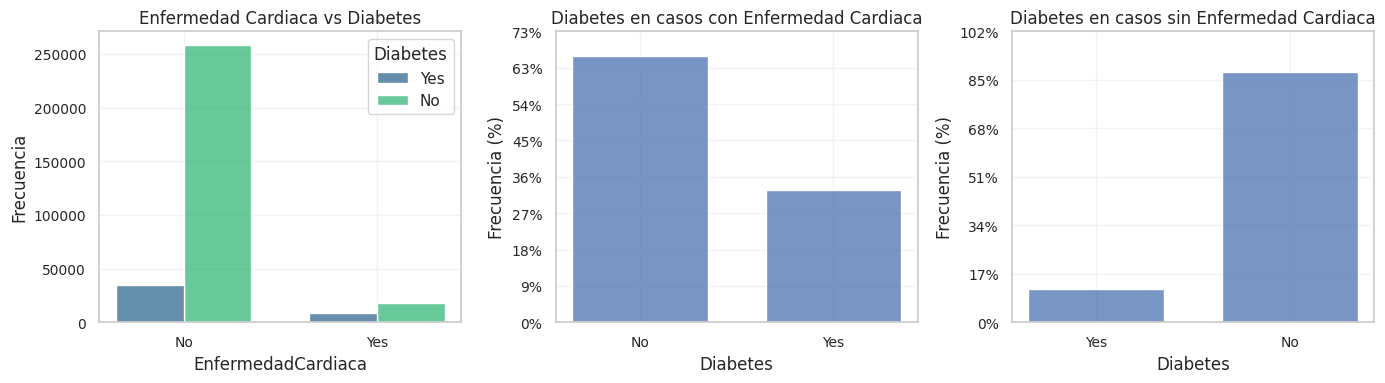

In [48]:
#se grafica diabetes vs enfermedad cardiaca
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

sns.histplot(x='EnfermedadCardiaca', data=df_diabetes, hue='Diabetes', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Diabetes")
ax[0].set_ylabel("Frecuencia")

sns.histplot(data=df_diabetes[df_diabetes['EnfermedadCardiaca'].eq('Yes')], x="Diabetes", shrink= 0.7, ax=ax[1])
total_samples_1 = len(df_diabetes[df_diabetes['EnfermedadCardiaca'] == 'Yes'])
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels([f'{int(tick / total_samples_1 * 100)}%' for tick in ax[1].get_yticks()])
ax[1].set_title("Diabetes en casos con Enfermedad Cardiaca")
ax[1].set_ylabel("Frecuencia (%)")
plt.tight_layout()

sns.histplot(data=df_diabetes[df_diabetes['EnfermedadCardiaca'].eq('No')], x="Diabetes", shrink= 0.7, ax=ax[2])
total_samples_2 = len(df_diabetes[df_diabetes['EnfermedadCardiaca'] == 'No'])
ax[2].set_yticks(ax[2].get_yticks())
ax[2].set_yticklabels([f'{int(tick / total_samples_2 * 100)}%' for tick in ax[2].get_yticks()])
ax[2].set_title("Diabetes en casos sin Enfermedad Cardiaca")
ax[2].set_ylabel("Frecuencia (%)")
plt.tight_layout()

Aquí podemos observar que de las personas que poseen una enfermedad cardiaca derca del 30% presenta diabetes, ahora de las personas que no presentan enfermedad cardiaca, solo el 15% aproximadamente presenta diabetes, es decir que en proporción se tiene un mayor porcentaje de personas diabeticas asociadad con enfermedad cardiaca que sin enfermedad cardiaca.

Es la dificultad para caminar un indicador de padecer una enfermedad cardiaca?

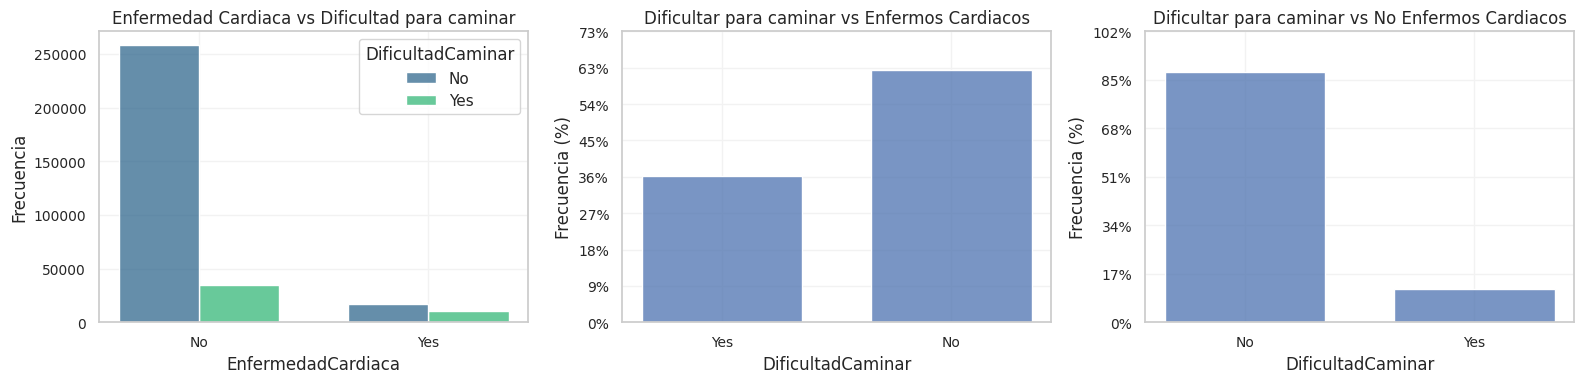

In [49]:
#se grafica dificultad para caminar vs enfermedad cardiaca
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.histplot(x='EnfermedadCardiaca', data=df, hue='DificultadCaminar', palette= 'viridis', multiple="dodge", shrink= 0.7,  ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Dificultad para caminar")
ax[0].set_ylabel("Frecuencia")

sns.histplot(data=df[df['EnfermedadCardiaca'].eq('Yes')], x="DificultadCaminar", shrink= 0.7, ax=ax[1])
total_samples_3 = len(df[df['EnfermedadCardiaca'] == 'Yes'])
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels([f'{int(tick / total_samples_3 * 100)}%' for tick in ax[1].get_yticks()])
ax[1].set_title("Dificultar para caminar vs Enfermos Cardiacos")
ax[1].set_ylabel("Frecuencia (%)")
plt.tight_layout()

sns.histplot(data=df[df['EnfermedadCardiaca'].eq('No')], x='DificultadCaminar', shrink= 0.7, ax=ax[2])
total_samples_4 = len(df[df['EnfermedadCardiaca'] == 'No'])
ax[2].set_yticks(ax[2].get_yticks())
ax[2].set_yticklabels([f'{int(tick / total_samples_4 * 100)}%' for tick in ax[2].get_yticks()])
ax[2].set_title("Dificultar para caminar vs No Enfermos Cardiacos")
ax[2].set_ylabel("Frecuencia (%)")
plt.tight_layout()


En este caso podemos observar que de las personas que poseen una enfermedad cardiaca derca del 36% presenta dificultad para caminar, ahora de las personas que no presentan enfermedad cardiaca, solo el 15% aproximadamente presenta dificultad para caminar, es decir que en proporción se tiene un mayor porcentaje de personas con dificultad para caminar asociadad con enfermedad cardiaca que sin enfermedad cardiaca.

Text(0, 0.5, 'Frecuencia')

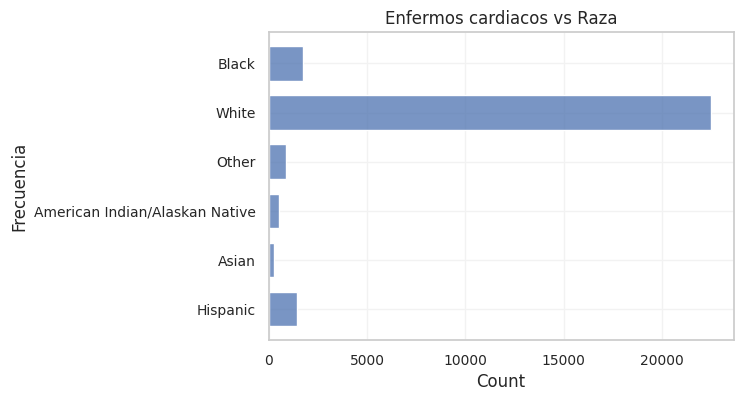

In [50]:
#se grafica raza vs individuo con enfermedad cardiaca
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.histplot(y='Raza', data=df[df['EnfermedadCardiaca'].eq('Yes')], multiple="dodge", shrink=0.7)
ax.get_yticklabels()
ax.set_title("Enfermos cardiacos vs Raza")
ax.set_ylabel("Frecuencia")

Se puede ver que la mayoría de las personas que presentan una enfermedad cardiaca son de raza blanca, pero esto puede deberse a que del total de encuestados la mayoria de ellos son de raza blanca, por lo que esta tendencia puede ser explicado porque la categoría no se encuentra balanceada. Y que pasa si evaluamos la proporción de enfermos cardiacos por cada raza?

[Text(0.5, 0, 'Proporción de Enfermos Cardiacos'),
 Text(0, 0.5, 'Raza'),
 Text(0.5, 1.0, 'Proporción de Enfermos Cardiacos respecto a No Enfermos vs Raza')]

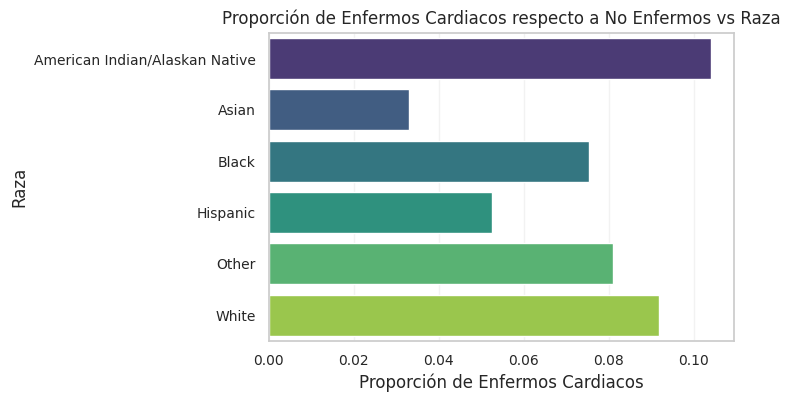

In [51]:
# Se calcula la proporción de enfermos y no enfermos cardiacos por cada raza
proportion_data = df.groupby(['Raza', 'EnfermedadCardiaca']).size().unstack()
proportion_data['Proporcion'] = proportion_data['Yes'] / (proportion_data['Yes'] + proportion_data['No'])

#Gráfico de barras para mostrar la proporción de enfermos cardiacos respecto a no enfermos por raza
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Proporcion', y=proportion_data.index, data=proportion_data, palette= 'viridis')
ax.set(xlabel="Proporción de Enfermos Cardiacos", ylabel="Raza", title="Proporción de Enfermos Cardiacos respecto a No Enfermos vs Raza")


Acá podemos ver que los resultados son diferentes, ya que los amerindios son los que presentan mayor proporción de casos de enfermedad cardiaca, y que los de raza blanca no están muy diferenciados de las demás razas.

Es probable que auqellas personas que presenten una enfermedad cardiaca consideren que su estado de salud general no sea bueno, veamos que dicen nuestros datos.

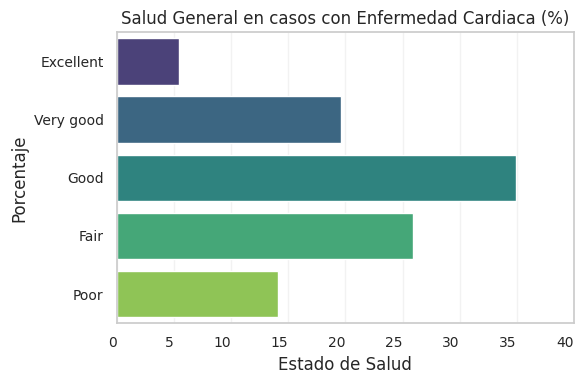

In [74]:
# Se calcula el porcentaje de cada estado de salud respecto al total
total_samples = len(df_con_enf_car)
health_state_percentages = df_con_enf_car['SaludGeneral'].value_counts(normalize=True) * 100

# Definir el orden de las etiquetas del eje x
health_state_order = ["Excellent", "Very good", "Good", "Fair", "Poor"]

# se crea el gráfico con los porcentajes
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=health_state_percentages.index, x=health_state_percentages.values, order=health_state_order, palette='viridis')
ax.set(title="Salud General en casos con Enfermedad Cardiaca (%)",
       xlabel="Estado de Salud",
       ylabel="Porcentaje")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")

plt.tight_layout()


A diferencia de lo que se esperaria, la mayoria de los enfermos cardiacos consideran que su estado de salud es bueno, o justo, si bien no consideran que tienen un estado de salud excelente o muy bueno, solo un pequeño porcentaje cree tener un estado de salud pobre, por lo que los enfermos cardiacos no parecen sentirse enfermos.

<Figure size 1000x400 with 0 Axes>

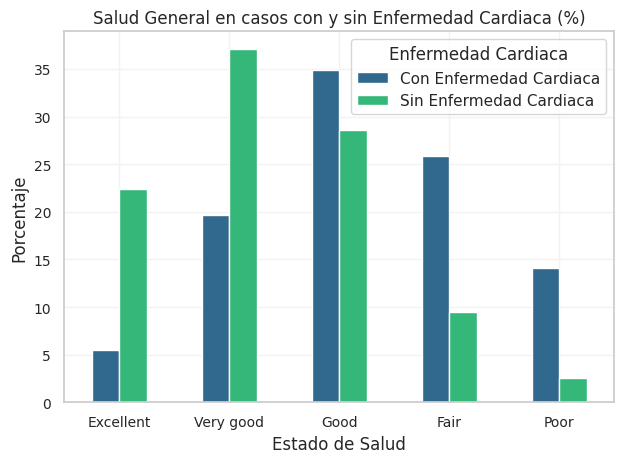

In [53]:
# Filtrar datos para pacientes con enfermedad cardíaca
df_cardiac = df[df['EnfermedadCardiaca'] == 'Yes']

# Filtrar datos para pacientes sin enfermedad cardíaca
df_no_cardiac = df[df['EnfermedadCardiaca'] == 'No']

# Calcular el porcentaje de cada estado de salud respecto al total para pacientes con enfermedad cardíaca
porcentages_cardiac = df_cardiac['SaludGeneral'].value_counts(normalize=True).reindex(["Excellent", "Very good", "Good", "Fair", "Poor"]) * 100

# Calcular el porcentaje de cada estado de salud respecto al total para pacientes sin enfermedad cardíaca
porcentages_no_cardiac = df_no_cardiac['SaludGeneral'].value_counts(normalize=True).reindex(["Excellent", "Very good", "Good", "Fair", "Poor"]) * 100

# Crear un DataFrame para los porcentajes
data = pd.DataFrame({'Con Enfermedad Cardiaca': porcentages_cardiac, 'Sin Enfermedad Cardiaca': porcentages_no_cardiac})

# Utilizar la paleta "viridis" de Seaborn
colors = sns.color_palette("viridis", len(data.columns))

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 4))
ax = data.plot(kind='bar', stacked=False, color=colors)

ax.set(title="Salud General en casos con y sin Enfermedad Cardiaca (%)",
       xlabel="Estado de Salud",
       ylabel="Porcentaje")

plt.xticks(rotation=0)
plt.legend(title="Enfermedad Cardiaca")
plt.tight_layout()
plt.show()

#RECOMENDACIONES

Como se pudo ver, el dataset se encuentra desbalanceado hacia la clase positiva de enfermedad, y esto puede deberse a que la mayoría de los encuestados son personas aparentemente sanas, pero a partir del análisis pudimos observar que las condiciones de salud van cambiando marcadamente con la edad, en especial a partir de los 40 años, por lo que ¿podría ser factible tener en cuenta solo a las personas mayores de 40 para el análisis, ya que a partir de esa edad comienzan a aparecer los problemas de salud? ¿se obtendría un mayor balance de las clases, estaría menos sesgado hacia personas sanas?, o sería mejor generar de manera aleatoria muestras sintéticas para la clase minoritaria, o utilizar alguna otra estrategia de muestreo aleatorio.

#CODIFICACION DE LAS VARIABLES

In [54]:
#se parte del dataset con los outliers reemplazados
df_outliers.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel,Es_Outlier_IMC,Es_Outlier_HorasSueño
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0,0


In [55]:
#se binariza la variable diabetes
df_replace_diabetes=df_outliers.replace(('No, borderline diabetes','Yes (during pregnancy)') ,('No', 'Yes'))

In [56]:
#se codifica la variable edad
df_replace_edad= df_replace_diabetes.replace(('18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

In [57]:
#se codifica la variable SaludGeneral
df_replace_saludgeneral= df_replace_edad.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (0, 1, 2, 3, 4))

In [58]:
#se codifica la variable objetivo
df_replace_enfermedadcardiaca= df_replace_saludgeneral.replace(('No', 'Yes'), (0, 1))

In [59]:
#se codificaN las variables categóricas usando el One Hot Encoder

columnas_a_codificar = ['Fumar', 'ConsumoAlcohol', 'AccidenteCerebroVascular', 'DificultadCaminar', 'Sexo', 'Raza', 'Diabetes', 'ActividadFisica', 'Asma', 'EnfermedadRenal', 'CancerDePiel']
datos_a_codificar = df_replace_enfermedadcardiaca[columnas_a_codificar]
enc = OneHotEncoder()
datos_codificados = enc.fit_transform(datos_a_codificar)
arreglo_codificado = datos_codificados.toarray()
df_codificado = pd.DataFrame(arreglo_codificado, columns=enc.get_feature_names_out(input_features=columnas_a_codificar))
df_codificado.head()

,Fumar_0,Fumar_1,ConsumoAlcohol_0,ConsumoAlcohol_1,AccidenteCerebroVascular_0,AccidenteCerebroVascular_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,...,Diabetes_0,Diabetes_1,ActividadFisica_0,ActividadFisica_1,Asma_0,Asma_1,EnfermedadRenal_0,EnfermedadRenal_1,CancerDePiel_0,CancerDePiel_1
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [60]:
#se unifican todas las variables (excepto la variable objetivo) en un único dataframe
df_codificado[['IMC','SaludFisica', 'SaludMental','Edad', 'SaludGeneral', 'HorasSueño']] = df_replace_enfermedadcardiaca[['IMC','SaludFisica', 'SaludMental','Edad', 'SaludGeneral', 'HorasSueño']]

In [61]:
df_codificado.head()

,Fumar_0,Fumar_1,ConsumoAlcohol_0,ConsumoAlcohol_1,AccidenteCerebroVascular_0,AccidenteCerebroVascular_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,...,EnfermedadRenal_0,EnfermedadRenal_1,CancerDePiel_0,CancerDePiel_1,IMC,SaludFisica,SaludMental,Edad,SaludGeneral,HorasSueño
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,16.60,3.0,30.0,7,1,5.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,20.34,0.0,0.0,12,1,7.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,26.58,20.0,30.0,9,3,8.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,24.21,0.0,0.0,11,2,6.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,23.71,28.0,0.0,4,1,8.0


#SELECCION DE VARIABLES

In [62]:
#se seleccionan las variables de interes con el metodo VarianceThreshold de sklearn, utilizando un umbral de 90%
sel = VarianceThreshold(threshold=(.90 * (1 - .90)))
datos_seleccionados= sel.fit_transform(df_codificado)
datos_seleccionados.shape

(319795, 19)

In [63]:
#se contruye un dataframe con las características seleccionadas
mascara_seleccion = sel.get_support()
caracteristicas_seleccionadas = [df_codificado.columns[i] for i, seleccionada in enumerate(mascara_seleccion) if seleccionada]
print("Características seleccionadas:", caracteristicas_seleccionadas)
df_x=df_codificado[caracteristicas_seleccionadas]
df_x

Características seleccionadas: ['Fumar_0', 'Fumar_1', 'DificultadCaminar_0', 'DificultadCaminar_1', 'Sexo_Female', 'Sexo_Male', 'Raza_White', 'Diabetes_0', 'Diabetes_1', 'ActividadFisica_0', 'ActividadFisica_1', 'Asma_0', 'Asma_1', 'IMC', 'SaludFisica', 'SaludMental', 'Edad', 'SaludGeneral', 'HorasSueño']


,Fumar_0,Fumar_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,Raza_White,Diabetes_0,Diabetes_1,ActividadFisica_0,ActividadFisica_1,Asma_0,Asma_1,IMC,SaludFisica,SaludMental,Edad,SaludGeneral,HorasSueño
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,16.60,3.0,30.0,7,1,5.00000
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,20.34,0.0,0.0,12,1,7.00000
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,26.58,20.0,30.0,9,3,8.00000
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24.21,0.0,0.0,11,2,6.00000
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,23.71,28.0,0.0,4,1,8.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,27.41,7.0,0.0,8,3,6.00000
319791,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,29.84,0.0,0.0,3,1,5.00000
319792,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,24.24,0.0,0.0,5,2,6.00000
319793,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,32.81,0.0,0.0,1,2,7.40748


Se utilizó el método VarianceThreshold de sklearn, utilizando un umbral de 90%, para seleccionar las variables de interés, como podemos ver el método seleccionó variables que se correlacionan con lo visto durante el análisis exploratorio de los datos.

#ELECCION DE MODELOS DE CLASIFICACION

##DEFINICION DE X E Y

In [64]:
#se define el x (variables seleccionadas)
X = df_x

In [65]:
#se define el y (la variable objetivo)
y = df_replace_enfermedadcardiaca['EnfermedadCardiaca']

##BALANCEO DEL DATASET

In [66]:
!pip install imbalanced-learn

In [67]:
# Calcular el número de instancias de cada clase
clase_0_count = np.sum(y == 0)
clase_1_count = np.sum(y == 1)

# Calcular el total de instancias
total_instancias = len(y)

# Calcular el porcentaje de cada clase
porcentaje_clase_0 = round((clase_0_count / total_instancias) * 100)
porcentaje_clase_1 = round((clase_1_count / total_instancias) * 100)

print(f'Porcentaje de la clase 0: {porcentaje_clase_0}%')
print(f'Porcentaje de la clase 1: {porcentaje_clase_1}%')

Porcentaje de la clase 0: 91%
Porcentaje de la clase 1: 9%


Como se puede notar, existe un desequilibrio significativo entre las clases, con una proporción de 9 a 1 entre la clase mayoritaria y la clase minoritaria. Ante esta disparidad, se opta por aplicar el método de SMOTE (Synthetic Minority Over-sampling Technique) para abordar este problema. SMOTE se encarga de generar de manera aleatoria muestras sintéticas para la clase minoritaria, lo que equilibra la distribución de clases y permite un entrenamiento más efectivo de modelos de aprendizaje automático en situaciones desequilibradas

In [68]:
#se utiliza el método SMOTE para balancear los datos

#se mprime la forma original del conjunto de datos de clases
print('Forma original del conjunto de datos %s' % Counter(y))

#se crea una instancia de SMOTE con una semilla aleatoria
sm = SMOTE(random_state=0)

#se aplica el método SMOTE para generar muestras sintéticas y balancear el conjunto de datos
X_res, y_res = sm.fit_resample(X, y)

#se imprime la forma del conjunto de datos balanceado después de aplicar SMOTE
print('Forma del conjunto de datos balanceado %s' % Counter(y_res))

Forma original del conjunto de datos Counter({0: 292422, 1: 27373})
Forma del conjunto de datos balanceado Counter({0: 292422, 1: 292422})


##DEFINICION DE TRAIN Y TEST

In [69]:
#se separan los datos en entrenamiento/test en razón 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2, random_state=0)

El problema planteado se trata de un problema de aprendizaje supervisado de clasificación, en donde se tiene una variable objetivo que puede tomar dos valores, está enfermo (1) o no está enfermo (0). Por ello se seleccionaran algoritmos de clasificación como ser: Regresion logistica, Random forest, KNN, etc.

##MODELO RANDOM FOREST

In [70]:
#se prueba el modelo random forest modelo_random_forest
modelo_random_forest= RandomForestClassifier(random_state=0)
modelo_random_forest.fit(X_train, y_train)
predichos_random_forest = modelo_random_forest.predict(X_test)

#EVALUACION DE MODELOS

Para evaluar el desempeño del modelo se utilizan métricas adecuadas para evaluar problemas de clasificación, como ser: recall, precisionl, accuracy, valor F1, matriz de confusión.

##MODELO RANDOM FOREST

In [71]:
print(metrics.classification_report(y_test, predichos_random_forest))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     58461
           1       0.94      0.91      0.92     58508

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



In [72]:
print(metrics.confusion_matrix(y_test, predichos_random_forest))

[[54800  3661]
 [ 5513 52995]]


**Precision (Precisión):**

Para la clase 0 (etiqueta 0), la precisión es del 91%. Esto significa que el 91% de las predicciones hechas por el modelo como clase 0 son realmente correctas.

Para la clase 1 (etiqueta 1), la precisión es del 94%. Esto significa que solo el 94% de las predicciones hechas por el modelo como clase 1 son realmente correctas.

**Recall (Recuperación o Sensibilidad):**

Para la clase 0 (etiqueta 0), el recall es del 94%. Esto significa que el 94% de las instancias reales de la clase 0 fueron correctamente identificadas por el modelo.

Para la clase 1 (etiqueta 1), el recall es del 91%. Esto significa que solo el 91% de las instancias reales de la clase 1 fueron correctamente identificadas por el modelo.

**F1-Score:**

Para la clase 0, el F1-score es del 0.92, lo que indica un buen equilibrio entre precisión y recall.

Para la clase 1, el F1-score es del 0.92, lo que indica un desequilibrio entre precisión y recall.

**Accuracy (Exactitud):**

La precisión global del modelo alcanza un notable 92%, lo que refleja el porcentaje de predicciones correctas en el conjunto de prueba en su totalidad.
En resumen, este modelo parece tener un rendimiento bastante bueno en términos de precisión, recall y F1-Score tanto para la clase 0 como para la clase 1. La alta precisión y recall indican que el modelo es efectivo para predecir ambas clases en el conjunto de datos.

#CONCLUSION

En resumen, este informe demuestra que el proceso de balanceo de datos fue efectivo, permitiendo que el modelo escogido tenga cierto grado de éxito en la identificación de la clase minoritaria. El modelo de Random Forest, mostró un rendimiento sobresaliente, con tasas de predicción superiores al 90% en todos los casos. Esto significa que el modelo Random Forest logra identificar de manera precisa tanto la clase positiva como la clase negativa. El próximo paso sería optimizar el modelo.